In [1]:
import os
import json

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

from utils.exploratory import zip_dtype

In [2]:
plt.rcParams['figure.figsize'] = [16, 12]

### Correlações - Escolas

In [3]:
escolas = pd.DataFrame()
escolas_path = os.path.relpath('../data/escolas')

escolas_files = [x for x in os.walk(escolas_path)][0][2]
for file in escolas_files:
    if not 'escolas' in file:
        continue
    escolas = escolas.append(pd.read_csv(os.path.join(escolas_path, file),
                                         dtype=zip_dtype('../schemas/escolas_schema.json')).sample(frac=0.05))

D:\Programs\Anaconda3\envs\torch\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10,12,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,124,125,126,127,128,129,130,136,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Programs\Anaconda3\envs\torch\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10,12,52,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,124,125,126,127,128,129,130,136,152,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Programs\Anaconda3\envs\torch\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10,12,52,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,124,125,126,127,128,129,130,136,155,191) have mixed types. Specify dtype option on import or 

In [4]:
escolas.head()

Unnamed: 0 ano_censo cod_escola_inep    regiao unidade_federativa  \
173071      173071      2007        35151701   Sudeste          São Paulo   
18261        18261      2007        29430470  Nordeste              Bahia   
34009        34009      2007        43022685       Sul  Rio Grande do Sul   
194390      194390      2007        31043494   Sudeste       Minas Gerais   
234463      234463      2007        35802207   Sudeste          São Paulo   

                        mesoregiao           microregiao  \
173071  Metropolitana de São Paulo             São Paulo   
18261            Centro Sul Baiano              Guanambi   
34009       Nordeste Rio-grandense         Caxias do Sul   
194390            Vale do Rio Doce  Governador Valadares   
234463  Metropolitana de São Paulo             São Paulo   

                   municipio tp_dependencia tp_dependencia_desc     ...       \
173071             São Paulo              4             Privada     ...        
18261      Riacho de Santana              3           Municipal     ...        
34009           Santa Tereza              3           Municipal     ...        
194390  Governador Valadares              2            Estadual     ...        
234463             São Paulo              4             Privada     ...        

       tp_indigena_lingua_desc co_lingua_indigena in_brasil_alfabetizado  \
173071                     NaN                NaN                  False   
18261                      NaN                NaN                  False   
34009                      NaN                NaN                  False   
194390                     NaN                NaN                  False   
234463                     NaN                NaN                  False   

       in_final_semana in_formacao_alternancia cod_municipio  \
173071           False                   False       3550308   
18261            False                   False       2926400   
34009            False                   False       4317251   
194390           False                   False       3127701   
234463           False                   False       3550308   

       num_matriculas_ensino_integral  num_estudantes_ensino_integral  \
173071                            NaN                             NaN   
18261                             NaN                             NaN   
34009                             NaN                             NaN   
194390                            NaN                             NaN   
234463                            NaN                             NaN   

        tp_integral  cod_ibge_uf  
173071          NaN           35  
18261           NaN           29  
34009           NaN           43  
194390          NaN           31  
234463          NaN           35  

[5 rows x 203 columns]

Text(0.5,1,'Clustering hierárquico de variáveis das escolas')

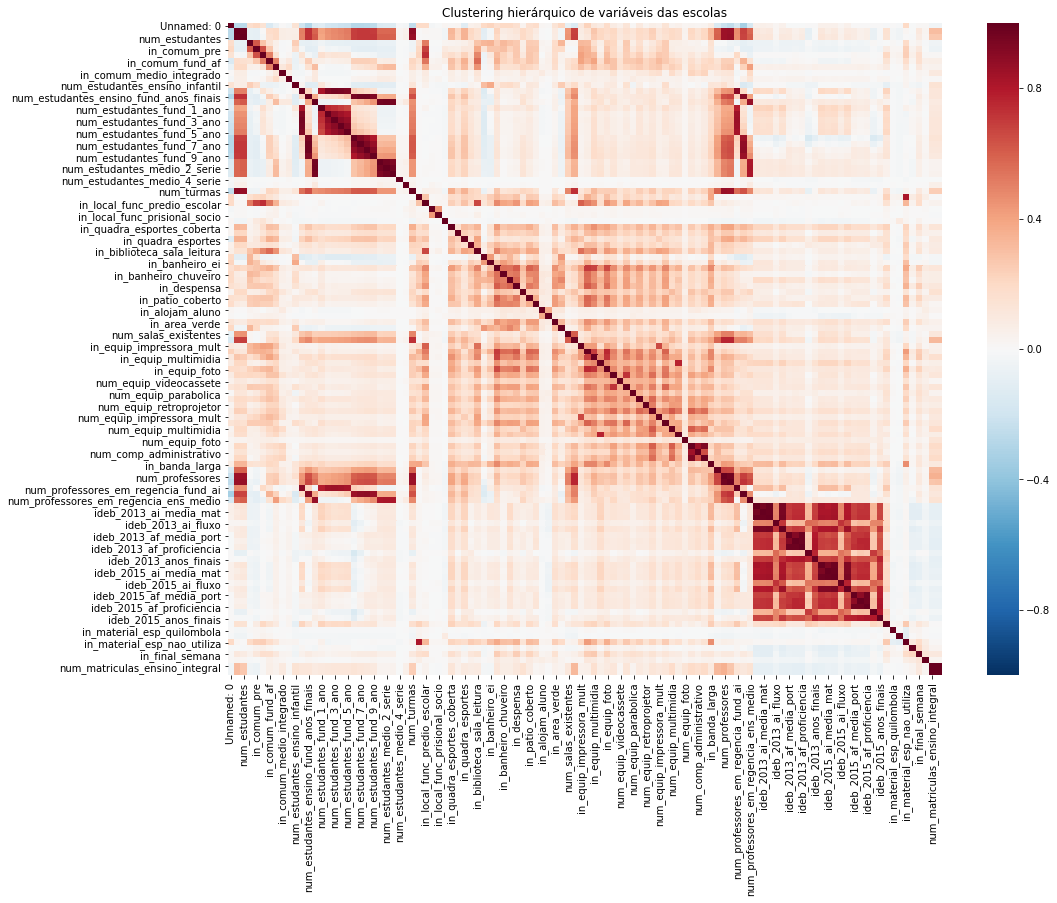

In [5]:
corr = escolas.iloc[:, ((escolas.dtypes != 'string') & (escolas.dtypes != 'object')).values].corr()
corr = corr.fillna(0.0)
sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdBu_r')
plt.title("Clustering hierárquico de variáveis das escolas")

### IDEB - Anos Iniciais

In [6]:
ideb_anos_iniciais = pd.read_csv('../data/ideb/ideb_escolas_anosiniciais2005_2017.csv',
                                 encoding='latin1',
                                 na_values=['-','ND'])
ideb_anos_iniciais['Cod_Escola_Completo'] = ideb_anos_iniciais['Cod_Escola_Completo'].astype('int')

D:\Programs\Anaconda3\envs\torch\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (64,65,67,68,70,71,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
ideb_anos_iniciais.head()

Co_UF  Cod_Municipio_Completo         Nome_Municipio  Cod_Escola_Completo  \
0    RO               1100015.0  Alta Floresta D'Oeste             11024666   
1    RO               1100015.0  Alta Floresta D'Oeste             11024682   
2    RO               1100015.0  Alta Floresta D'Oeste             11024828   
3    RO               1100015.0  Alta Floresta D'Oeste             11024968   
4    RO               1100015.0  Alta Floresta D'Oeste             11025077   

                              Nome_Escola       Rede  \
0                    EMEIEF BOA ESPERANCA  Municipal   
1             EEEF EURIDICE LOPES PEDROSO   Estadual   
2                  EMEIEF IZIDORO STEDILE  Municipal   
3  EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA   Estadual   
4              EMEIEF MARIA DE SOUZA PEGO  Municipal   

   TaxaAprovacao2005_1ao5ano  TaxaAprovacao2005_1ano  TaxaAprovacao2005_2ano  \
0                        NaN                     NaN                     NaN   
1                       93.1                     NaN                   100.0   
2                        NaN                     NaN                     NaN   
3                       89.4                     NaN                   100.0   
4                        NaN                     NaN                     NaN   

   TaxaAprovacao2005_3ano        ...         Ideb2015  Ideb2017  \
0                     NaN        ...              5.4       5.6   
1                    93.7        ...              5.8       6.9   
2                     NaN        ...              5.0       4.9   
3                    82.9        ...              5.9       NaN   
4                     NaN        ...              NaN       4.6   

   ProjecaoIdeb2007  ProjecaoIdeb2009  ProjecaoIdeb2011  ProjecaoIdeb2013  \
0               NaN               NaN               NaN               NaN   
1               4.2               4.6               5.0               5.3   
2               NaN               NaN               3.2               3.5   
3               4.5               4.9               5.3               5.5   
4               NaN               NaN               NaN               NaN   

   ProjecaoIdeb2015  ProjecaoIdeb2017  ProjecaoIdeb2019  ProjecaoIdeb2021  
0               NaN               5.6               5.9               6.1  
1               5.5               5.8               6.1               6.3  
2               3.8               4.1               4.4               4.7  
3               5.8               6.1               6.3               6.6  
4               NaN               NaN               4.9               5.2  

[5 rows x 91 columns]

Text(0.5,1,'Clustering hierárquico de variáveis do IDEB')

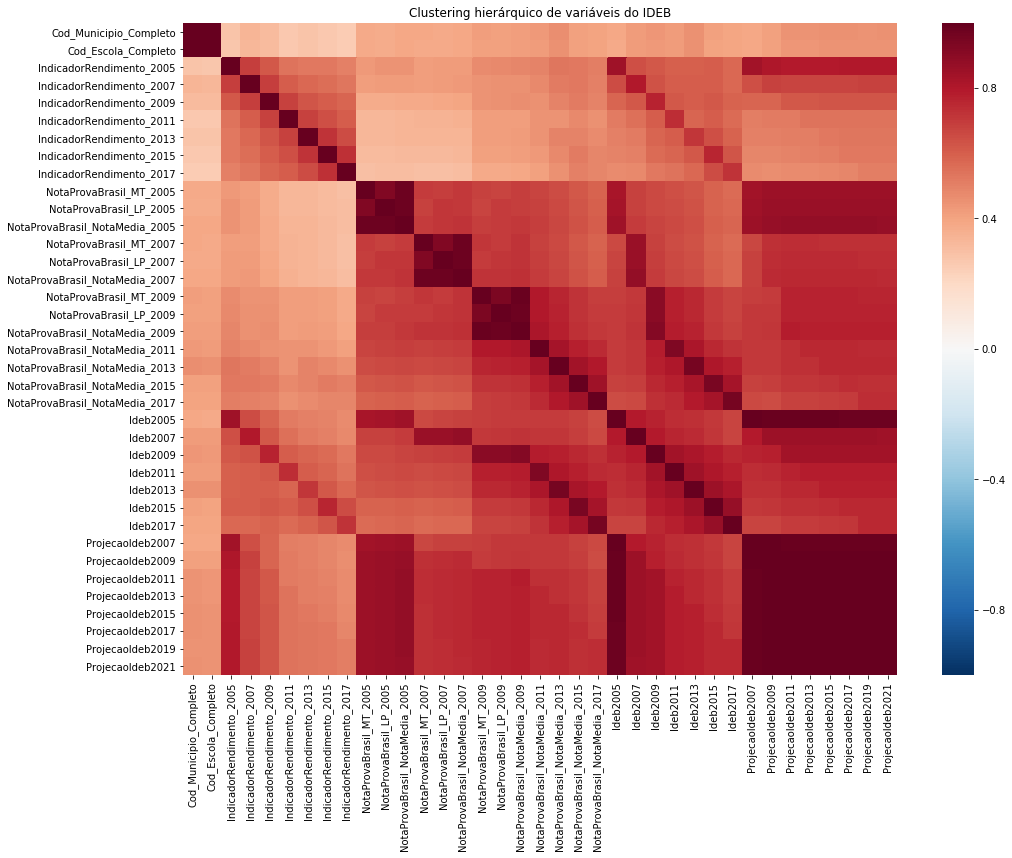

In [8]:
ideb_corr = ideb_anos_iniciais.corr().fillna(0.0)
non_approval_columns = [col for col in ideb_corr.columns if not col.startswith('Taxa')]
sns.heatmap(ideb_corr.loc[non_approval_columns, non_approval_columns], vmin=-1, vmax=1, cmap='RdBu_r')
plt.title("Clustering hierárquico de variáveis do IDEB")

### IDEB - Anos Finais

In [9]:
ideb_anos_finais = pd.read_csv('../data/ideb/ideb_escolas_anosfinais2005_2017.csv',
                                 encoding='latin1',
                                 na_values=['-','ND'])
ideb_anos_finais['Cod_Escola_Completo'] = ideb_anos_finais['Cod_Escola_Completo'].astype('int')

D:\Programs\Anaconda3\envs\torch\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (60,61,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
ideb_anos_finais.head()

Co_UF  Cod_Municipio_Completo         Nome_Municipio  Cod_Escola_Completo  \
0    RO               1100015.0  Alta Floresta D'Oeste             11024666   
1    RO               1100015.0  Alta Floresta D'Oeste             11024682   
2    RO               1100015.0  Alta Floresta D'Oeste             11024828   
3    RO               1100015.0  Alta Floresta D'Oeste             11024917   
4    RO               1100015.0  Alta Floresta D'Oeste             11024968   

                              Nome_Escola       Rede  \
0                    EMEIEF BOA ESPERANCA  Municipal   
1             EEEF EURIDICE LOPES PEDROSO   Estadual   
2                  EMEIEF IZIDORO STEDILE  Municipal   
3             EMEIEF JOSE BASILIO DA GAMA  Municipal   
4  EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA   Estadual   

   TaxaAprovacao2005_6ao9ano  TaxaAprovacao2005_6ano  TaxaAprovacao2005_7ano  \
0                        NaN                     NaN                     NaN   
1                       81.0                    75.6                    86.2   
2                        NaN                     NaN                     NaN   
3                        NaN                     NaN                     NaN   
4                       78.1                    72.0                    79.1   

   TaxaAprovacao2005_8ano        ...         Ideb2015  Ideb2017  \
0                     NaN        ...              NaN       4.1   
1                    84.5        ...              NaN       NaN   
2                     NaN        ...              NaN       4.8   
3                     NaN        ...              NaN       NaN   
4                    94.0        ...              4.6       5.3   

   ProjecaoIdeb2007  ProjecaoIdeb2009  ProjecaoIdeb2011  ProjecaoIdeb2013  \
0               NaN               NaN               4.3               4.6   
1               3.9               4.1               4.3               4.7   
2               NaN               NaN               2.8               3.1   
3               NaN               NaN               3.6               3.9   
4               3.5               3.7               3.9               4.3   

   ProjecaoIdeb2015  ProjecaoIdeb2017  ProjecaoIdeb2019  ProjecaoIdeb2021  
0               4.9               5.2               5.4               5.7  
1               5.1               5.4               5.6               5.8  
2               3.4               3.7               3.9               4.2  
3               4.2               4.5               4.7               5.0  
4               4.7               5.0               5.2               5.5  

[5 rows x 84 columns]

Text(0.5,1,'Clustering hierárquico de variáveis do IDEB')

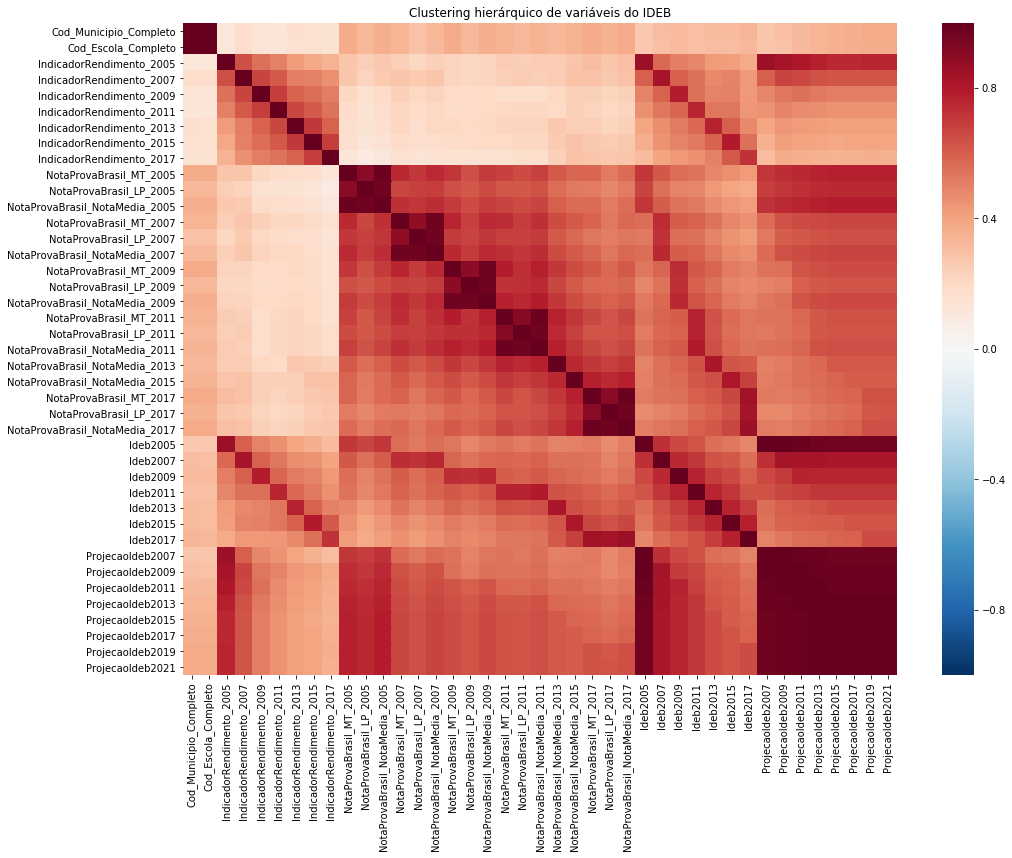

In [11]:
ideb_corr = ideb_anos_finais.corr().fillna(0.0)
non_approval_columns = [col for col in ideb_corr.columns if not col.startswith('Taxa')]
sns.heatmap(ideb_corr.loc[non_approval_columns, non_approval_columns], vmin=-1, vmax=1, cmap='RdBu_r')
plt.title("Clustering hierárquico de variáveis do IDEB")

## IDEB com Escola para 2017

In [12]:
escolas_2017 = pd.read_csv(os.path.join(escolas_path, 'escolas20170101.csv'),
                           dtype=zip_dtype('../schemas/escolas_schema.json'))

D:\Programs\Anaconda3\envs\torch\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10,12,52,59,61,63,64,68,69,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,98,99,102,104,105,107,108,113,121,124,125,126,127,128,129,130,136,152,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
escolas_2017.head()

Unnamed: 0 ano_censo cod_escola_inep regiao unidade_federativa  \
0           0      2017        11021012  Norte           Rondônia   
1           1      2017        11037288  Norte           Rondônia   
2           2      2017        11045787  Norte           Rondônia   
3           3      2017        11010088  Norte           Rondônia   
4           4      2017        11040203  Norte           Rondônia   

          mesoregiao microregiao           municipio tp_dependencia  \
0  Leste Rondoniense   Ji-Paraná     Vale do Paraíso              3   
1  Leste Rondoniense   Ji-Paraná               Urupá              4   
2  Leste Rondoniense   Ariquemes  Machadinho D'Oeste              3   
3  Leste Rondoniense   Ariquemes        Alto Paraíso              3   
4  Leste Rondoniense   Ji-Paraná          Nova União              3   

  tp_dependencia_desc     ...      tp_indigena_lingua_desc co_lingua_indigena  \
0           Municipal     ...                          NaN                NaN   
1             Privada     ...                          NaN                NaN   
2           Municipal     ...                          NaN                NaN   
3           Municipal     ...                          NaN                NaN   
4           Municipal     ...                          NaN                NaN   

  in_brasil_alfabetizado in_final_semana in_formacao_alternancia  \
0                  False           False                   False   
1                  False           False                   False   
2                  False           False                   False   
3                  False           False                   False   
4                  False           False                   False   

  cod_municipio num_matriculas_ensino_integral  \
0       1101807                            NaN   
1       1101708                            NaN   
2       1100130                            NaN   
3       1100403                            NaN   
4       1101435                            NaN   

   num_estudantes_ensino_integral  tp_integral  cod_ibge_uf  
0                             NaN        False           11  
1                             NaN        False           11  
2                             NaN        False           11  
3                             NaN        False           11  
4                             NaN        False           11  

[5 rows x 203 columns]

In [14]:
ideb_anos_iniciais.columns.values

array(['Co_UF', 'Cod_Municipio_Completo', 'Nome_Municipio',
       'Cod_Escola_Completo', 'Nome_Escola', 'Rede',
       'TaxaAprovacao2005_1ao5ano', 'TaxaAprovacao2005_1ano',
       'TaxaAprovacao2005_2ano', 'TaxaAprovacao2005_3ano',
       'TaxaAprovacao2005_4ano', 'TaxaAprovacao2005_5ano',
       'IndicadorRendimento_2005', 'TaxaAprovacao2007_1ao5ano',
       'TaxaAprovacao2007_1ano', 'TaxaAprovacao2007_2ano',
       'TaxaAprovacao2007_3ano', 'TaxaAprovacao2007_4ano',
       'TaxaAprovacao2007_5ano', 'IndicadorRendimento_2007',
       'TaxaAprovacao2009_1ao5ano', 'TaxaAprovacao2009_1ano',
       'TaxaAprovacao2009_2ano', 'TaxaAprovacao2009_3ano',
       'TaxaAprovacao2009_4ano', 'TaxaAprovacao2009_5ano',
       'IndicadorRendimento_2009', 'TaxaAprovacao2011_1ao5ano',
       'TaxaAprovacao2011_1ano', 'TaxaAprovacao2011_2ano',
       'TaxaAprovacao2011_3ano', 'TaxaAprovacao2011_4ano',
       'TaxaAprovacao2011_5ano', 'IndicadorRendimento_2011',
       'TaxaAprovacao2013_1ao5ano', 'Taxa

In [15]:
escolas_2017_ideb_iniciais = escolas_2017.merge(ideb_anos_iniciais, left_on='cod_escola_inep', right_on='Cod_Escola_Completo', how='inner')
escolas_2017_ideb_iniciais.head()

Empty DataFrame
Columns: [Unnamed: 0, ano_censo, cod_escola_inep, regiao, unidade_federativa, mesoregiao, microregiao, municipio, tp_dependencia, tp_dependencia_desc, tp_rede_publica, rede_publica_desc, in_somente_matriculas_ac_ou_aee, tp_rede, tp_rede_nome, tp_rede_cod, nome_escola, num_matriculas, num_estudantes, in_comum_creche, in_comum_pre, in_comum_fund_ai, in_comum_fund_af, in_comum_medio_medio, in_comum_medio_integrado, in_comum_medio_normal, num_estudantes_ensino_infantil, num_estudantes_ensino_fund_anos_iniciais, num_estudantes_ensino_fund_anos_finais, num_estudantes_ensino_medio_propedeutico, num_estudantes_fund_1_ano, num_estudantes_fund_2_ano, num_estudantes_fund_3_ano, num_estudantes_fund_4_ano, num_estudantes_fund_5_ano, num_estudantes_fund_6_ano, num_estudantes_fund_7_ano, num_estudantes_fund_8_ano, num_estudantes_fund_9_ano, num_estudantes_medio_1_serie, num_estudantes_medio_2_serie, num_estudantes_medio_3_serie, num_estudantes_medio_4_serie, num_estudantes_medio_nao_seriada, num_turmas, tp_situacao_funcionamento, tp_situacao_funcionamento_desc, in_em_atividade, tp_localizacao, tp_localizacao_desc, tp_categoria_escola_privada, tp_categoria_escola_privada_desc, in_conveniada_pp, in_conveniada_pp_desc, tp_convenio_poder_publico, tp_convenio_poder_publico_desc, in_local_func_predio_escolar, tp_ocupacao_predio_escolar, tp_ocupacao_predio_escolar_desc, in_local_func_salas_empresa, in_local_func_socioeducativo, in_local_func_unid_prisional, in_local_func_prisional_socio, in_local_func_templo_igreja, in_local_func_casa_professor, in_local_func_galpao, tp_ocupacao_galpao, tp_ocupacao_galpao_desc, in_local_func_salas_outra_esc, in_local_func_outros, in_predio_compartilhado, in_agua_filtrada, in_agua_rede_publica, in_agua_poco_artesiano, in_agua_cacimba, in_agua_fonte_rio, in_agua_inexistente, in_energia_rede_publica, in_energia_gerador, in_energia_outros, in_energia_inexistente, in_esgoto_rede_publica, in_esgoto_fossa, in_esgoto_inexistente, in_lixo_coleta_periodica, in_lixo_queima, in_lixo_joga_outra_area, in_lixo_recicla, in_lixo_enterra, in_lixo_outros, in_sala_diretoria, in_sala_professor, in_laboratorio_informatica, in_laboratorio_ciencias, in_sala_atendimento_especial, in_quadra_esportes_coberta, in_quadra_esportes_descoberta, in_quadra_esportes, in_cozinha, in_biblioteca, ...]
Index: []

[0 rows x 294 columns]

In [16]:
escolas_2017_ideb_finais = escolas_2017.merge(ideb_anos_finais, left_on='cod_escola_inep', right_on='Cod_Escola_Completo', how='inner')
escolas_2017_ideb_finais.head()

Empty DataFrame
Columns: [Unnamed: 0, ano_censo, cod_escola_inep, regiao, unidade_federativa, mesoregiao, microregiao, municipio, tp_dependencia, tp_dependencia_desc, tp_rede_publica, rede_publica_desc, in_somente_matriculas_ac_ou_aee, tp_rede, tp_rede_nome, tp_rede_cod, nome_escola, num_matriculas, num_estudantes, in_comum_creche, in_comum_pre, in_comum_fund_ai, in_comum_fund_af, in_comum_medio_medio, in_comum_medio_integrado, in_comum_medio_normal, num_estudantes_ensino_infantil, num_estudantes_ensino_fund_anos_iniciais, num_estudantes_ensino_fund_anos_finais, num_estudantes_ensino_medio_propedeutico, num_estudantes_fund_1_ano, num_estudantes_fund_2_ano, num_estudantes_fund_3_ano, num_estudantes_fund_4_ano, num_estudantes_fund_5_ano, num_estudantes_fund_6_ano, num_estudantes_fund_7_ano, num_estudantes_fund_8_ano, num_estudantes_fund_9_ano, num_estudantes_medio_1_serie, num_estudantes_medio_2_serie, num_estudantes_medio_3_serie, num_estudantes_medio_4_serie, num_estudantes_medio_nao_seriada, num_turmas, tp_situacao_funcionamento, tp_situacao_funcionamento_desc, in_em_atividade, tp_localizacao, tp_localizacao_desc, tp_categoria_escola_privada, tp_categoria_escola_privada_desc, in_conveniada_pp, in_conveniada_pp_desc, tp_convenio_poder_publico, tp_convenio_poder_publico_desc, in_local_func_predio_escolar, tp_ocupacao_predio_escolar, tp_ocupacao_predio_escolar_desc, in_local_func_salas_empresa, in_local_func_socioeducativo, in_local_func_unid_prisional, in_local_func_prisional_socio, in_local_func_templo_igreja, in_local_func_casa_professor, in_local_func_galpao, tp_ocupacao_galpao, tp_ocupacao_galpao_desc, in_local_func_salas_outra_esc, in_local_func_outros, in_predio_compartilhado, in_agua_filtrada, in_agua_rede_publica, in_agua_poco_artesiano, in_agua_cacimba, in_agua_fonte_rio, in_agua_inexistente, in_energia_rede_publica, in_energia_gerador, in_energia_outros, in_energia_inexistente, in_esgoto_rede_publica, in_esgoto_fossa, in_esgoto_inexistente, in_lixo_coleta_periodica, in_lixo_queima, in_lixo_joga_outra_area, in_lixo_recicla, in_lixo_enterra, in_lixo_outros, in_sala_diretoria, in_sala_professor, in_laboratorio_informatica, in_laboratorio_ciencias, in_sala_atendimento_especial, in_quadra_esportes_coberta, in_quadra_esportes_descoberta, in_quadra_esportes, in_cozinha, in_biblioteca, ...]
Index: []

[0 rows x 287 columns]

In [17]:
escolas_2017['cod_escola_inep'].sort_values()

115718    11000023
115664    11000040
168982    11000058
343       11000066
790       11000074
168909    11000082
168923    11000104
1281      11000163
168952    11000171
630       11000180
168981    11000198
191175    11000201
1490      11000210
168963    11000244
168980    11000252
191312    11000260
191317    11000295
115814    11000309
115791    11000317
168975    11000325
239       11000341
168969    11000350
191244    11000368
191231    11000376
115800    11000384
1176      11000406
115695    11000422
1481      11000449
115833    11000457
190852    11000465
            ...   
282340    53068181
282131    53068190
282198    53068203
168736    53068211
282108    53068220
282303    53068238
115316    53068246
115474    53068254
96225     53081005
190309    53081013
190249    53081021
190401    53082001
190269    53082010
190235    53082028
96395     53082036
115350    53083008
190299    53083016
96420     53084004
190280    53084012
190270    53084020
190388    53084039
190376    53

## Boxplots do IDEB

In [ ]:
sns.boxplot(data=ideb_anos_iniciais[[x for x in ideb_anos_iniciais.columns if 'Ideb' in x]])

In [ ]:
ideb_anos_iniciais['dif_Ideb_2007'] = ideb_anos_iniciais['Ideb2007'] - ideb_anos_iniciais['Ideb2005']
ideb_anos_iniciais['dif_Ideb_2009'] = ideb_anos_iniciais['Ideb2009'] - ideb_anos_iniciais['Ideb2007']
ideb_anos_iniciais['dif_Ideb_2011'] = ideb_anos_iniciais['Ideb2011'] - ideb_anos_iniciais['Ideb2009']
ideb_anos_iniciais['dif_Ideb_2013'] = ideb_anos_iniciais['Ideb2013'] - ideb_anos_iniciais['Ideb2011']
ideb_anos_iniciais['dif_Ideb_2015'] = ideb_anos_iniciais['Ideb2015'] - ideb_anos_iniciais['Ideb2013']
ideb_anos_iniciais['dif_Ideb_2017'] = ideb_anos_iniciais['Ideb2017'] - ideb_anos_iniciais['Ideb2015']

In [ ]:
sns.boxplot(data=ideb_anos_iniciais[[x for x in ideb_anos_iniciais.columns if 'dif_Ideb' in x]])

In [ ]:
ideb_anos_iniciais['percentual_Ideb_2007'] = (ideb_anos_iniciais['Ideb2007'] - ideb_anos_iniciais['Ideb2005']) / ideb_anos_iniciais['Ideb2005']
ideb_anos_iniciais['percentual_Ideb_2009'] = (ideb_anos_iniciais['Ideb2009'] - ideb_anos_iniciais['Ideb2007']) / ideb_anos_iniciais['Ideb2007']
ideb_anos_iniciais['percentual_Ideb_2011'] = (ideb_anos_iniciais['Ideb2011'] - ideb_anos_iniciais['Ideb2009']) / ideb_anos_iniciais['Ideb2009']
ideb_anos_iniciais['percentual_Ideb_2013'] = (ideb_anos_iniciais['Ideb2013'] - ideb_anos_iniciais['Ideb2011']) / ideb_anos_iniciais['Ideb2011']
ideb_anos_iniciais['percentual_Ideb_2015'] = (ideb_anos_iniciais['Ideb2015'] - ideb_anos_iniciais['Ideb2013']) / ideb_anos_iniciais['Ideb2013']
ideb_anos_iniciais['percentual_Ideb_2017'] = (ideb_anos_iniciais['Ideb2017'] - ideb_anos_iniciais['Ideb2015']) / ideb_anos_iniciais['Ideb2015']

In [ ]:
sns.boxplot(data=ideb_anos_iniciais[[x for x in ideb_anos_iniciais.columns if x.startswith('percentual')]])

In [ ]:
ideb_anos_iniciais[[x for x in ideb_anos_iniciais.columns if x.startswith('Ideb')]].mean()

In [ ]:
ideb_anos_iniciais[[x for x in ideb_anos_iniciais.columns if x.startswith('dif')]].mean()

In [ ]:
ideb_anos_iniciais[[x for x in ideb_anos_iniciais.columns if x.startswith('dif')]].plot(kind='hist', bins=100, alpha=0.3)

In [ ]:
ideb_anos_iniciais[[x for x in ideb_anos_iniciais.columns if x.startswith('Ideb')]].plot(kind='hist', bins=100, alpha=0.3)

In [ ]:
ideb_anos_iniciais['percentual_Ideb_2017'].plot(kind='hist', bins=100)

In [ ]:
ideb_anos_iniciais[[x for x in ideb_anos_iniciais if x.startswith('dif')]].corr()

In [ ]:
ideb_anos_iniciais[[x for x in ideb_anos_iniciais if x.startswith('percent')]].corr()

IDEB anos finais

In [ ]:
sns.boxplot(data=ideb_anos_finais[[x for x in ideb_anos_finais.columns if 'Ideb' in x]])

In [ ]:
ideb_anos_finais['dif_Ideb_2007'] = ideb_anos_finais['Ideb2007'] - ideb_anos_finais['Ideb2005']
ideb_anos_finais['dif_Ideb_2009'] = ideb_anos_finais['Ideb2009'] - ideb_anos_finais['Ideb2007']
ideb_anos_finais['dif_Ideb_2011'] = ideb_anos_finais['Ideb2011'] - ideb_anos_finais['Ideb2009']
ideb_anos_finais['dif_Ideb_2013'] = ideb_anos_finais['Ideb2013'] - ideb_anos_finais['Ideb2011']
ideb_anos_finais['dif_Ideb_2015'] = ideb_anos_finais['Ideb2015'] - ideb_anos_finais['Ideb2013']
ideb_anos_finais['dif_Ideb_2017'] = ideb_anos_finais['Ideb2017'] - ideb_anos_finais['Ideb2015']

In [ ]:
sns.boxplot(data=ideb_anos_finais[[x for x in ideb_anos_finais.columns if 'dif_Ideb' in x]])

In [ ]:
ideb_anos_finais['percentual_Ideb_2007'] = (ideb_anos_finais['Ideb2007'] - ideb_anos_finais['Ideb2005']) / ideb_anos_finais['Ideb2005']
ideb_anos_finais['percentual_Ideb_2009'] = (ideb_anos_finais['Ideb2009'] - ideb_anos_finais['Ideb2007']) / ideb_anos_finais['Ideb2007']
ideb_anos_finais['percentual_Ideb_2011'] = (ideb_anos_finais['Ideb2011'] - ideb_anos_finais['Ideb2009']) / ideb_anos_finais['Ideb2009']
ideb_anos_finais['percentual_Ideb_2013'] = (ideb_anos_finais['Ideb2013'] - ideb_anos_finais['Ideb2011']) / ideb_anos_finais['Ideb2011']
ideb_anos_finais['percentual_Ideb_2015'] = (ideb_anos_finais['Ideb2015'] - ideb_anos_finais['Ideb2013']) / ideb_anos_finais['Ideb2013']
ideb_anos_finais['percentual_Ideb_2017'] = (ideb_anos_finais['Ideb2017'] - ideb_anos_finais['Ideb2015']) / ideb_anos_finais['Ideb2015']

In [ ]:
sns.boxplot(data=ideb_anos_finais[[x for x in ideb_anos_finais.columns if x.startswith('percentual')]])

In [ ]:
ideb_anos_finais[[x for x in ideb_anos_finais.columns if x.startswith('Ideb')]].mean()

In [ ]:
ideb_anos_finais[[x for x in ideb_anos_finais.columns if x.startswith('dif')]].mean()

In [ ]:
ideb_anos_finais[[x for x in ideb_anos_finais.columns if x.startswith('dif')]].plot(kind='hist', bins=100, alpha=0.3)

In [ ]:
ideb_anos_finais[[x for x in ideb_anos_finais.columns if x.startswith('Ideb')]].plot(kind='hist', bins=100, alpha=0.3)

In [ ]:
ideb_anos_finais['percentual_Ideb_2017'].plot(kind='hist', bins=100)

In [ ]:
sns.heatmap(ideb_anos_finais[[x for x in ideb_anos_finais if x.startswith('Ideb')]].corr(),
            vmin=-1, vmax=1, cmap='RdBu_r', annot=True)

In [ ]:
sns.heatmap(ideb_anos_finais[[x for x in ideb_anos_finais if x.startswith('dif')]].corr(),
            vmin=-1, vmax=1, cmap='RdBu_r', annot=True)

In [ ]:
ideb_anos_finais[[x for x in ideb_anos_finais if x.startswith('percent')]].corr()

## Juntando Anos Iniciais e Finais

In [ ]:
ideb_all = ideb_anos_iniciais.merge(ideb_anos_finais, on='Cod_Escola_Completo', suffixes=['_iniciais', '_finais'])

In [ ]:
sns.heatmap(ideb_all[[x for x in ideb_all.columns if x.startswith('Ideb')]].corr(),
            vmin=-1, vmax=1, cmap='RdBu_r', annot=True)

In [ ]:
sns.heatmap(ideb_all[[x for x in ideb_all.columns if x.startswith('dif')]].corr(),
            vmin=-1, vmax=1, cmap='RdBu_r', annot=True)

In [ ]:
sns.heatmap(ideb_all[[x for x in ideb_all.columns if x.startswith('percent')]].corr(),
            vmin=-1, vmax=1, cmap='RdBu_r', annot=True)

In [ ]:
escolas_2017.columns.values

In [ ]:
escolas_2017['tp_localizacao'].value_counts()